In [4]:
import torch ## pytorch : facebook, tensorflow : google
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random
import torch.nn as nn
import numpy as np

In [5]:
### gpu에서 돌리기 위한 세팅.
device = 'cuda' if torch.cuda.is_available() else 'cpu'
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)


### hyper-parameter
epochs = 15 ## 학습 횟수
batch_size = 100 ## 몇 개씩 데이터를 묶음지어 학습시킬지

In [7]:
### 데이터셋 다운로드 ( MNIST )
mnist_train = dsets.MNIST(root = 'MNIST_data/', train = True, 
                          transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root = 'MNIST_data/', train = False, 
                         transform=transforms.ToTensor(), download=True)
data_loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size = batch_size, shuffle=True, drop_last = True)

### 인공 신경망(DNN)
my_network = torch.nn.Linear(784,10, bias=True).to(device) # my_network : 내가 구축한 인공신경만 (7840개의 weight(784 * 10 + 10))
criterion = torch.nn.CrossEntropyLoss().to(device) # criterion : 손실함수(loss) = 얼마나 정답과 차이가 나는지 계산하는 함수
optimizer = torch.optim.SGD(my_network.parameters(), lr=0.1) # optimizer : w들이 담겨있는 곳

In [9]:
### Training (학습)(weight 조정)
### epo : 몇번 째 학습인지
for epo in range(epochs):
  avg_cost = 0
  total_batch = len(data_loader)
  for X, Y in data_loader:

    X = X.view(-1,784).to(device)
    Y = Y.to(device)
    optimizer.zero_grad()
    pred = my_network(X)
    cost = criterion(pred, Y)
    cost.backward()
    optimizer.step()
    avg_cost += cost/total_batch
  print('Epoch : ', '%04d' % (epo+1), 'cost = ', '{:.9f}'.format(avg_cost))
print("Training END")

Epoch :  0001 cost =  0.535254478
Epoch :  0002 cost =  0.359565467
Epoch :  0003 cost =  0.331331462
Epoch :  0004 cost =  0.316739529
Epoch :  0005 cost =  0.307082176
Epoch :  0006 cost =  0.300353378
Epoch :  0007 cost =  0.295035094
Epoch :  0008 cost =  0.290944397
Epoch :  0009 cost =  0.287454665
Epoch :  0010 cost =  0.284611940
Epoch :  0011 cost =  0.281964421
Epoch :  0012 cost =  0.279787809
Epoch :  0013 cost =  0.277861863
Epoch :  0014 cost =  0.276170701
Epoch :  0015 cost =  0.274366587
Training END


Accuracy :  0.8904999494552612
Label :  5
my prediction :  5


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


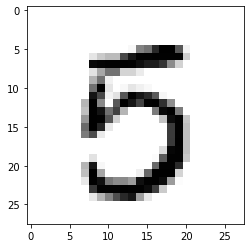

In [15]:
with torch.no_grad():
  X_test = mnist_test.test_data.view(-1,784).float().to(device)
  Y_test = mnist_test.test_labels.to(device)
  pred = my_network(X_test)
  correct_pred = torch.argmax(pred,1) == Y_test
  acc = correct_pred.float().mean()
  print('Accuracy : ', acc.item())

  i = random.randint(0, len(mnist_test)-1)
  X_single = mnist_test.test_data[i:i+1].view(-1,784).float().to(device)
  Y_single = mnist_test.test_labels[i:i+1].to(device)
  print('Label : ', Y_single.item())
  s_pred = my_network(X_single)
  print('my prediction : ', torch.argmax(s_pred,1).item())
  plt.imshow(mnist_test.test_data[i:i+1].view(28,28), cmap = 'Greys', interpolation = 'nearest')
  plt.show()


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 

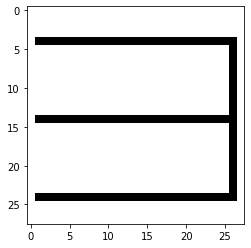

Label :  3


In [21]:
my_data = [[0 for i in range(28)] for i in range(28)]

for i in range(4,25,10):
  for j in range(1,27):
    my_data[i][j]=1
for i in range(4,25):
  my_data[i][26]=1
my_data = np.array(my_data)
print(my_data)
with torch.no_grad():
    my_data = torch.tensor(my_data)
    plt.imshow(my_data.view(28,28),cmap='Greys',interpolation='nearest')
    plt.show()
    my_data_flatten = my_data.view(-1,784).float().to(device)
    result = my_network(my_data_flatten)
    print('Label : ', torch.argmax(result, 1).item())